In [ ]:
from scipy.stats import skew, binomtest, spearmanr, pearsonr
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


BACKLOG TABLE (for some questions)

In [ ]:
backlog_tab = pd.read_csv("backlog_table.csv")

print(backlog_tab.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   backlog_id       20 non-null     object
 1   planned          20 non-null     object
 2   description      20 non-null     object
 3   date_added       20 non-null     object
 4   complete_status  20 non-null     object
dtypes: object(5)
memory usage: 932.0+ bytes
None


In [ ]:
#Conversion to datetime
backlog_tab['date_added'] = pd.to_datetime(backlog_tab['date_added'], dayfirst=True, errors='coerce')

#Convert to binary
backlog_tab['is_completed'] = backlog_tab['complete_status'].map({'Yes': 1, 'No': 0}).astype(int)
backlog_tab['is_planned'] = backlog_tab['planned'].map({'Yes': 1, 'No': 0}).astype(int)

In [ ]:
# Get percentage of clearance

total_backlogs = len(backlog_tab)
completed_backlogs = backlog_tab['is_completed'].sum()

clearance_rate = completed_backlogs / total_backlogs * 100


In [ ]:
backlog = backlog_tab.drop(columns=[
    'planned',
    'complete_status',
], errors='ignore')

In [ ]:
backlog.head(20)

,backlog_id,description,date_added,is_completed,is_planned
0,B01,Data input task by brother,2025-12-01,1,1
1,B02,Read first 20 pages of Probability chapter,2025-12-04,1,1
2,B03,Day 3 of taking 8 glasses of water,2025-11-29,1,1
3,B04,Reread Intermediate Python in Datacamp,2025-11-24,1,1
4,B05,Finish Supervised Learning Track in Datacamp,2026-01-07,1,1
5,B06,Go back to lifting weights for the 5th day for...,2026-01-12,1,1
6,B07,Run 5-km around UST,2025-12-12,1,1
7,B08,Wake up at 8am for day 15,2025-12-19,1,1
8,B09,Achieve the 90th-day streak in Datacamp,2026-01-03,1,1
9,B10,Finish Linked-In Account,2026-01-08,1,1


In [ ]:
backlog_tab.describe()

,date_added,is_completed,is_planned
count,20,20.000000,20.0
mean,2025-12-25 00:00:00,0.900000,1.0
min,2025-11-20 00:00:00,0.000000,1.0
25%,2025-12-07 00:00:00,1.000000,1.0
50%,2025-12-23 00:00:00,1.000000,1.0
75%,2026-01-09 00:00:00,1.000000,1.0
max,2026-02-04 00:00:00,1.000000,1.0
std,NaN,0.307794,0.0


In [ ]:
backlog_tab.isna().sum()

,0
backlog_id,0
planned,0
description,0
date_added,0
complete_status,0
is_completed,0
is_planned,0


In [ ]:
backlog_tab.duplicated().sum()

np.int64(0)

DAILY PLAN TABLE

In [ ]:
daily = pd.read_csv("daily_plan_table.csv")

daily.columns = daily.columns.str.strip().str.lower()
daily['date'] = pd.to_datetime(daily['date'], dayfirst=True)



In [ ]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 285 non-null    datetime64[ns]
 1   day_of_week          285 non-null    object        
 2   planning_streak      285 non-null    int64         
 3   phase                285 non-null    int64         
 4   task_number          261 non-null    float64       
 5   is_backlog           261 non-null    object        
 6   backlog_id           20 non-null     object        
 7   task_description     261 non-null    object        
 8   expected_difficulty  261 non-null    float64       
 9   expected_motivation  261 non-null    float64       
 10  complete_or_not      261 non-null    object        
 11  reason_task_outcome  261 non-null    object        
 12  mood_before          261 non-null    float64       
 13  mood_after           261 non-null  

In [ ]:
daily.describe()

,date,planning_streak,phase,task_number,expected_difficulty,expected_motivation,mood_before,mood_after
count,285,285.000000,285.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,2025-12-31 00:40:25.263158016,15.873684,3.371930,2.260536,3.429119,4.210728,3.708812,3.923372
min,2025-11-04 00:00:00,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000
25%,2025-12-12 00:00:00,5.000000,3.000000,1.000000,3.000000,4.000000,3.000000,3.000000
50%,2026-01-03 00:00:00,15.000000,4.000000,2.000000,3.000000,4.000000,4.000000,4.000000
75%,2026-01-21 00:00:00,25.000000,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000
max,2026-02-07 00:00:00,39.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000
std,NaN,11.533700,0.877287,1.052988,0.619984,0.624530,0.738683,0.760737


In [ ]:
daily.isna().sum()

# Some parts have no values because there are days without any plan at all


,0
date,0
day_of_week,0
planning_streak,0
phase,0
task_number,24
is_backlog,24
backlog_id,265
task_description,24
expected_difficulty,24
expected_motivation,24


In [ ]:
# Need to convert from text to numeric
int_cols = [
    'planning_streak', 'phase', 'task_number',
    'expected_difficulty', 'expected_motivation',
    'mood_before', 'mood_after'
]

for col in int_cols:
    if col in daily.columns:
        # Convert to numeric, invalid → NaN, then to nullable Int64
        daily[col] = pd.to_numeric(daily[col], errors='coerce').astype('Int64')


In [ ]:
daily['completed'] = daily['complete_or_not'].map({'Yes': 1, 'No': 0})

In [ ]:
# Standardize

daily['has_written_plan'] = daily['task_number'].notna().astype(int)
daily['is_backlog_flag'] = daily['backlog_id'].notna().astype(int)


In [ ]:
daily.head(20)

,date,day_of_week,planning_streak,phase,task_number,is_backlog,backlog_id,task_description,expected_difficulty,expected_motivation,complete_or_not,reason_task_outcome,mood_before,mood_after,completed,has_written_plan,is_backlog_flag
0,2025-11-04,Tuesday,0,1,<NA>,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaN,0,0
1,2025-11-05,Wednesday,0,1,<NA>,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaN,0,0
2,2025-11-06,Thursday,0,1,<NA>,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaN,0,0
3,2025-11-07,Friday,0,1,<NA>,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaN,0,0
4,2025-11-08,Saturday,0,1,<NA>,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaN,0,0
5,2025-11-09,Sunday,0,1,<NA>,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaN,0,0
6,2025-11-10,Monday,0,1,<NA>,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaN,0,0
7,2025-11-11,Tuesday,0,1,<NA>,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaN,0,0
8,2025-11-12,Wednesday,0,1,<NA>,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaN,0,0
9,2025-11-13,Thursday,0,1,<NA>,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaN,0,0


In [ ]:
daily['task_number'] = daily['task_number'].fillna(0)
daily['completed'] = daily['completed'].fillna(0)

# Correctly define 'has_written_plan' AFTER filling NaNs in 'task_number'
daily['has_written_plan'] = (daily['task_number'] > 0).astype(int)

# Drop not needed for Statistical Analysis
daily_clean = daily.drop(columns=[
    'day_of_week',
    'task_description',
    'reason_task_outcome',
    'backlog_id',
    'is_backlog',
    'complete_or_not',
    'expected_difficulty',
    'expected_motivation',
    'mood_before',
    'mood_after'
], errors='ignore')

In [ ]:
daily_clean.head(20)

,date,planning_streak,phase,task_number,completed,has_written_plan,is_backlog_flag
0,2025-11-04,0,1,0,0.0,0,0
1,2025-11-05,0,1,0,0.0,0,0
2,2025-11-06,0,1,0,0.0,0,0
3,2025-11-07,0,1,0,0.0,0,0
4,2025-11-08,0,1,0,0.0,0,0
5,2025-11-09,0,1,0,0.0,0,0
6,2025-11-10,0,1,0,0.0,0,0
7,2025-11-11,0,1,0,0.0,0,0
8,2025-11-12,0,1,0,0.0,0,0
9,2025-11-13,0,1,0,0.0,0,0


In [ ]:
# ANALYSIS TABLE
daily_agg = daily_clean.groupby('date', as_index=False).agg(
    planning_streak      = ('planning_streak', 'first'),
    has_written_plan     = ('has_written_plan', 'first'),
    tasks_number        = ('task_number', 'count'),
    completion_rate      = ('completed', 'mean'),
    backlog_tasks        = ('is_backlog_flag', 'sum'),
).reset_index(drop=True)

daily_agg['successful_day'] = (daily_agg['completion_rate'] >= 1).astype(int) #tasks are done 100% (daily)
daily_agg['day_of_week_num'] = daily_agg['date'].dt.weekday  # 0=Monday 6=Sunday

In [ ]:
daily_agg.head(40)

,date,planning_streak,has_written_plan,tasks_number,completion_rate,backlog_tasks,successful_day,day_of_week_num
0,2025-11-04,0,0,1,0.000000,0,0,1
1,2025-11-05,0,0,1,0.000000,0,0,2
2,2025-11-06,0,0,1,0.000000,0,0,3
3,2025-11-07,0,0,1,0.000000,0,0,4
4,2025-11-08,0,0,1,0.000000,0,0,5
5,2025-11-09,0,0,1,0.000000,0,0,6
6,2025-11-10,0,0,1,0.000000,0,0,0
7,2025-11-11,0,0,1,0.000000,0,0,1
8,2025-11-12,0,0,1,0.000000,0,0,2
9,2025-11-13,0,0,1,0.000000,0,0,3


In [ ]:
daily_agg.describe()

,date,planning_streak,has_written_plan,tasks_number,completion_rate,backlog_tasks,successful_day,day_of_week_num
count,96,96.0,96.000000,96.0,96.000000,96.000000,96.000000,96.000000
mean,2025-12-21 12:00:00,12.927083,0.812500,2.96875,0.695312,0.208333,0.562500,3.000000
min,2025-11-04 00:00:00,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,2025-11-27 18:00:00,2.0,1.000000,2.0,0.500000,0.000000,0.000000,1.000000
50%,2025-12-21 12:00:00,10.5,1.000000,3.0,1.000000,0.000000,1.000000,3.000000
75%,2026-01-14 06:00:00,22.25,1.000000,4.0,1.000000,0.000000,1.000000,5.000000
max,2026-02-07 00:00:00,39.0,1.000000,4.0,1.000000,1.000000,1.000000,6.000000
std,NaN,11.760097,0.392361,1.099791,0.402991,0.408248,0.498682,1.984148


In [ ]:

selected_columns = ['has_written_plan','planning_streak', 'tasks_number', 'completion_rate', 'backlog_tasks']
descriptive_stats = daily_agg[selected_columns].describe()


print("Descriptive Statistics for Key Variables:")
display(descriptive_stats)

Descriptive Statistics for Key Variables:


,has_written_plan,planning_streak,tasks_number,completion_rate,backlog_tasks
count,96.000000,96.0,96.0,96.000000,96.000000
mean,0.812500,12.927083,2.96875,0.695312,0.208333
std,0.392361,11.760097,1.099791,0.402991,0.408248
min,0.000000,0.0,1.0,0.000000,0.000000
25%,1.000000,2.0,2.0,0.500000,0.000000
50%,1.000000,10.5,3.0,1.000000,0.000000
75%,1.000000,22.25,4.0,1.000000,0.000000
max,1.000000,39.0,4.0,1.000000,1.000000


In [ ]:
daily_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              96 non-null     datetime64[ns]
 1   planning_streak   96 non-null     Int64         
 2   has_written_plan  96 non-null     int64         
 3   tasks_number      96 non-null     Int64         
 4   completion_rate   96 non-null     float64       
 5   backlog_tasks     96 non-null     int64         
 6   successful_day    96 non-null     int64         
 7   day_of_week_num   96 non-null     int32         
dtypes: Int64(2), datetime64[ns](1), float64(1), int32(1), int64(3)
memory usage: 5.9 KB


In [ ]:
daily_agg.isna().sum()

,0
date,0
planning_streak,0
has_written_plan,0
tasks_number,0
completion_rate,0
backlog_tasks,0
successful_day,0
day_of_week_num,0


In [ ]:
daily_agg.duplicated().sum()

np.int64(0)

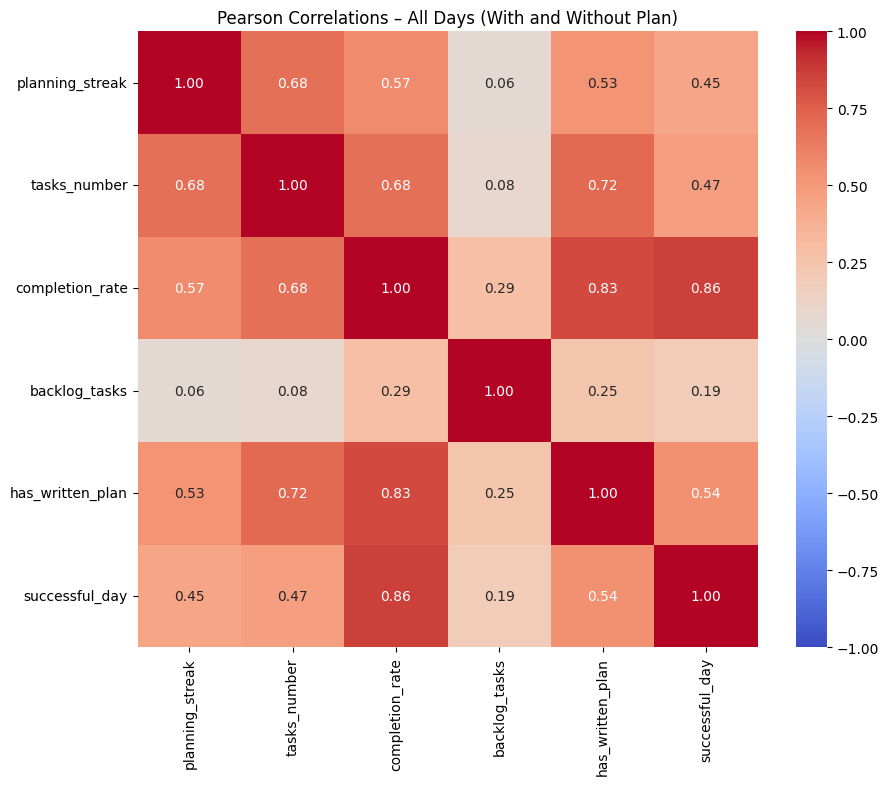

In [ ]:
numeric_cols = [
    'planning_streak',
    'tasks_number',
    'completion_rate',
    'backlog_tasks',
    'has_written_plan',
    'successful_day'
]
# Calculate correlation for all days
corr_pearson = daily_agg[numeric_cols].corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(corr_pearson, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Pearson Correlations – All Days (With and Without Plan)")
plt.show()

/tmp/ipython-input-2101176914.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_written_plan', y='completion_rate', data=daily_agg, palette='Set2')


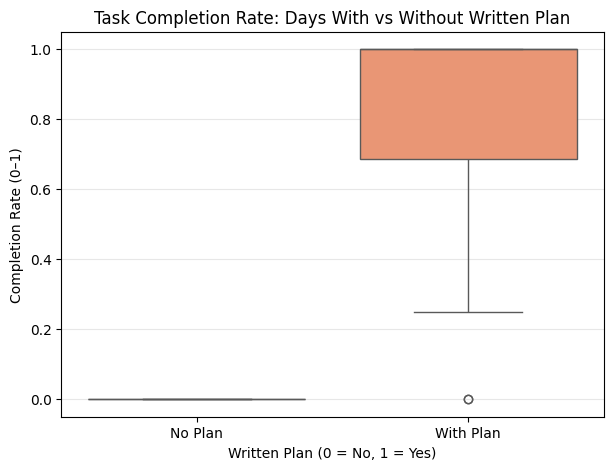

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='has_written_plan', y='completion_rate', data=daily_agg, palette='Set2')
plt.title("Task Completion Rate: Days With vs Without Written Plan")
plt.xlabel("Written Plan (0 = No, 1 = Yes)")
plt.ylabel("Completion Rate (0–1)")
plt.xticks([0,1], ['No Plan', 'With Plan'])
plt.grid(axis='y', alpha=0.3)
plt.show()

The above shows that days with a written plan tend to have higher completion rates than days without a plan

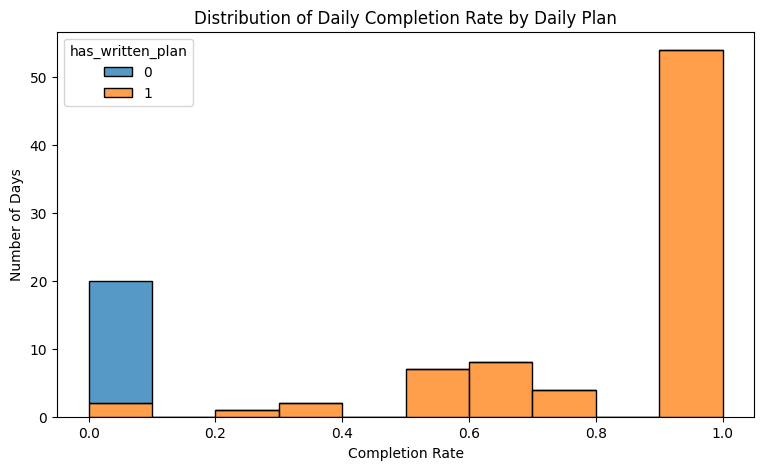

In [ ]:
plt.figure(figsize=(9,5))
sns.histplot(data=daily_agg, x='completion_rate', hue='has_written_plan', multiple='stack', bins=10)
plt.title("Distribution of Daily Completion Rate by Daily Plan")
plt.xlabel("Completion Rate")
plt.ylabel("Number of Days")
plt.show()


In [ ]:

numeric_cols_for_skewness = [
    'planning_streak',
    'has_written_plan',
    'tasks_number',
    'completion_rate',
    'backlog_tasks',
    'successful_day',
    'day_of_week_num'
]


skewness_data = {}
print("\nSkewness of numeric columns in daily_agg:")
for col in numeric_cols_for_skewness:
    if col in daily_agg.columns:

        col_data = pd.to_numeric(daily_agg[col], errors='coerce').dropna()
        if not col_data.empty:
            skew_val = skew(col_data)
            skewness_data[col] = skew_val
            print(f"  {col}: {skew_val:.3f}")
        else:
            print(f"  {col}: No non-NaN data to calculate skewness")
    else:
        print(f"  {col}: Column not found in daily_agg")

skewness_df = pd.DataFrame(list(skewness_data.items()), columns=['Column', 'Skewness'])


Skewness of numeric columns in daily_agg:
  planning_streak: 0.527
  has_written_plan: -1.601
  tasks_number: -0.606
  completion_rate: -0.878
  backlog_tasks: 1.436
  successful_day: -0.252
  day_of_week_num: 0.000


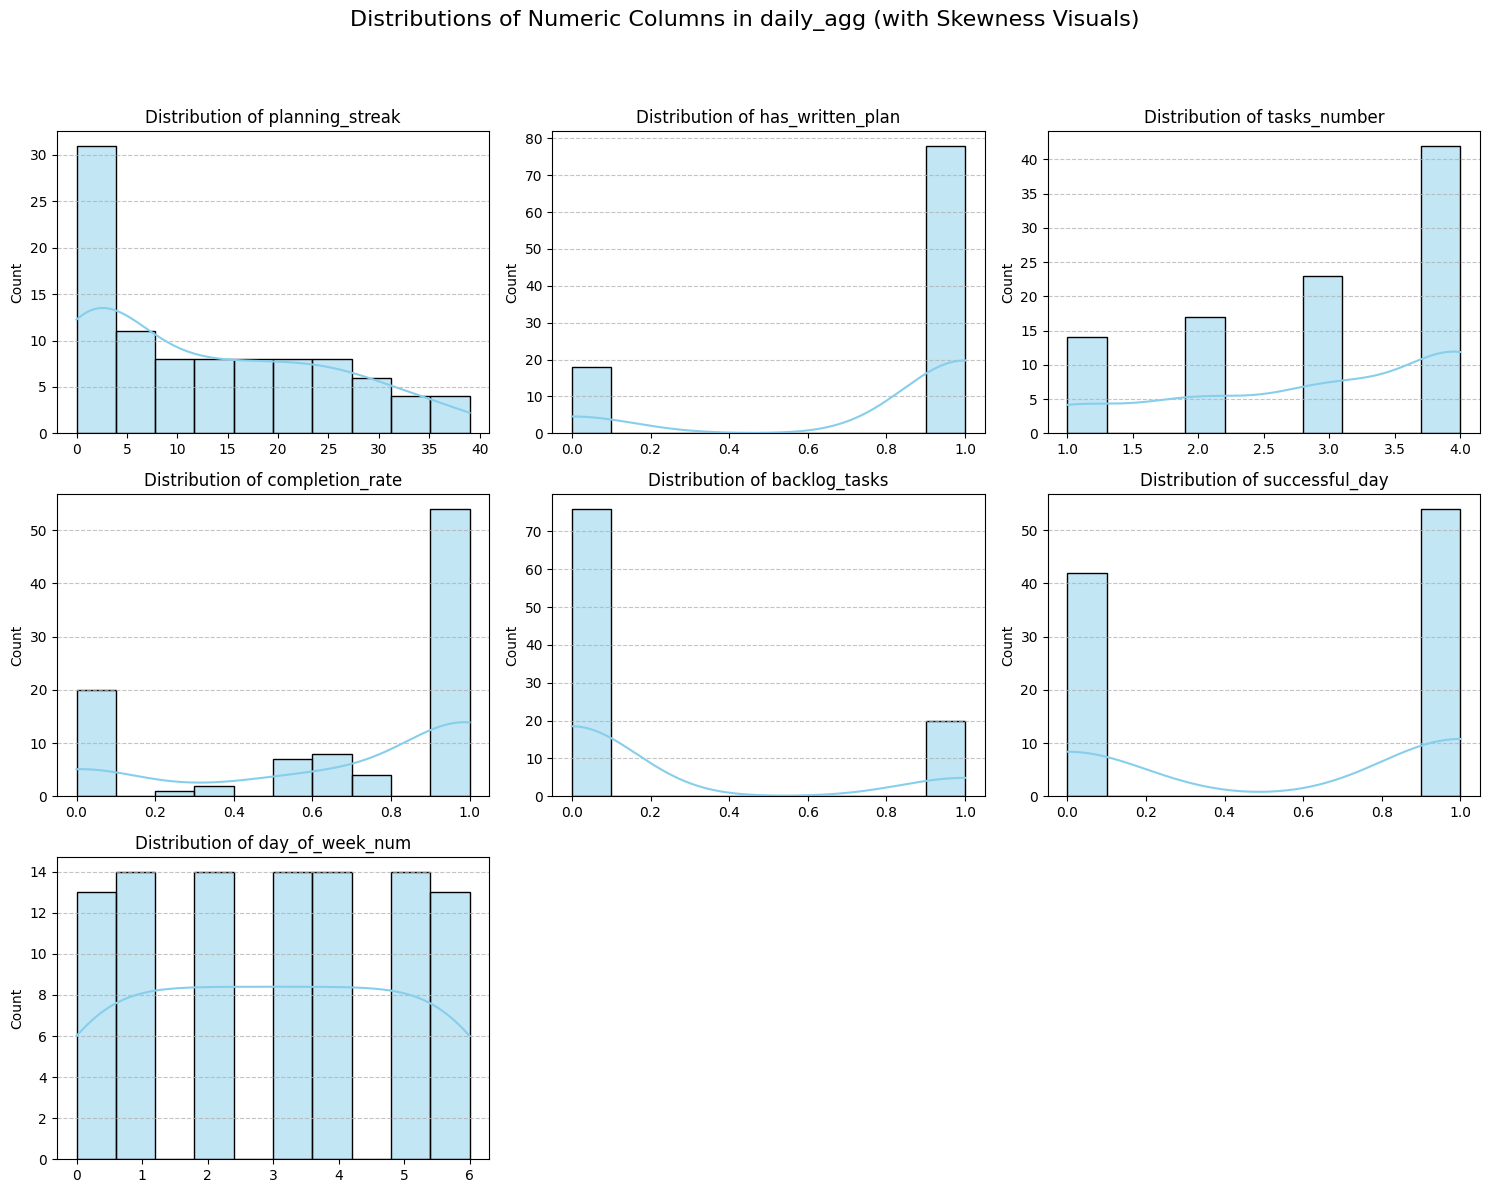

In [ ]:
plot_data = daily_agg[numeric_cols_for_skewness]


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols_for_skewness):
    if col in plot_data.columns:
        sns.histplot(plot_data[col].dropna(), kde=True, ax=axes[i], color='skyblue', bins=10)
        axes[i].set_title(f'Distribution of {col}', fontsize=12)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Density' if axes[i].collections else 'Count')
        axes[i].grid(axis='y', alpha=0.75, linestyle='--')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Distributions of Numeric Columns in daily_agg (with Skewness Visuals)', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

STATISTICAL TEST

In [ ]:
print("Shape of daily_agg:", daily_agg.shape)
print(daily_agg['has_written_plan'].value_counts(dropna=False))
print("\nUnique values in has_written_plan:")
print(daily_agg['has_written_plan'].unique())

Shape of daily_agg: (96, 8)
has_written_plan
1    78
0    18
Name: count, dtype: int64

Unique values in has_written_plan:
[0 1]


OBJECTIVE 1 | Impact of creating task plans to maintain daily planning streak

In [ ]:
plan_streak_summary = daily_agg.groupby('has_written_plan', as_index=False).agg(
    n_days=('date', 'count'),
    mean_planning_streak=('planning_streak', 'mean'),
    median_planning_streak=('planning_streak', 'median'),
    min_planning_streak=('planning_streak', 'min'),
    max_planning_streak=('planning_streak', 'max')
)

print("Summary of Planning Streak by 'Has Written Plan' Status")
print("───────────────────────────────────────────────────────────")
print(plan_streak_summary.to_string(index=False))

Summary of Planning Streak by 'Has Written Plan' Status
───────────────────────────────────────────────────────────
 has_written_plan  n_days  mean_planning_streak  median_planning_streak  min_planning_streak  max_planning_streak
                0      18                   0.0                     0.0                    0                    0
                1      78             15.910256                    15.0                    1                   39


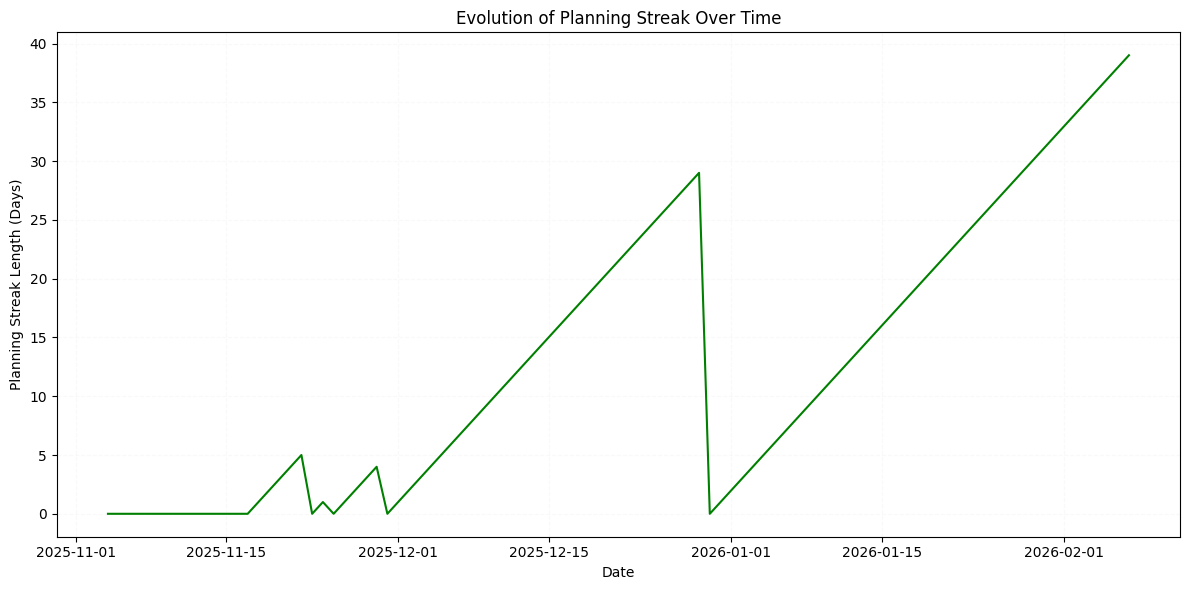

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='planning_streak', data=daily_agg, color='green')
plt.title('Evolution of Planning Streak Over Time')
plt.xlabel('Date')
plt.ylabel('Planning Streak Length (Days)')
plt.grid(True, linestyle='--', alpha=0.07)
plt.tight_layout()
plt.show()

In [ ]:
print("\nDescriptive Statistics for Planning Streak:")
print(daily_agg['planning_streak'].describe())


Descriptive Statistics for Planning Streak:
count         96.0
mean     12.927083
std      11.760097
min            0.0
25%            2.0
50%           10.5
75%          22.25
max           39.0
Name: planning_streak, dtype: Float64


In [ ]:

quartiles = daily_agg['planning_streak'].describe()
min_val = quartiles['min']
q1 = quartiles['25%']
q2 = quartiles['50%']
q3 = quartiles['75%']
max_val = quartiles['max']

bins = [min_val - 1e-6, q1, q2, q3, max_val]

labels = [
    f'{int(min_val)}-{int(q1)} days',
    f'{int(q1)+1}-{int(q2)} days',
    f'{int(q2)+1}-{int(q3)} days',
    f'{int(q3)+1}-{int(max_val)} days'
]

#  new binned column
daily_agg['planning_streak_bin'] = pd.cut(
    daily_agg['planning_streak'],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=True
)

# count of days in each bin
print("Distribution of Planning Streak Bins:")
display(daily_agg['planning_streak_bin'].value_counts().sort_index())

Distribution of Planning Streak Bins:


,count
planning_streak_bin,
0-2 days,27
3-10 days,21
11-22 days,24
23-39 days,24


OBJECTIVE 2 | Find the maximum streak length of 100% daily completion rate

First, showing the days with 100% completion rate and those that did not achieve it.

In [ ]:
successful = daily_agg[daily_agg['completion_rate'] == 1]
lesser     = daily_agg[daily_agg['completion_rate'] < 1]

print(f"Successful (≥100%): {len(successful)} days, mean completion = {lesser['completion_rate'].mean():.3f}")
print(f"Failed (<100%):      {len(lesser)} days, mean completion = {lesser['completion_rate'].mean():.3f}")
print(f"Sum: {len(successful) + len(lesser)}")

Successful (≥100%): 54 days, mean completion = 0.304
Failed (<100%):      42 days, mean completion = 0.304
Sum: 96


Computation of Streaks

In [ ]:
successful_days = daily_agg[daily_agg['successful_day'] == 1].copy()

successful_days['prev_date'] = successful_days['date'].shift(1)
successful_days['is_new_streak'] = ((successful_days['date'] - successful_days['prev_date']).dt.days > 1)
successful_days['is_new_streak'] = successful_days['is_new_streak'].astype(int)

print(successful_days.head())

         date  planning_streak  has_written_plan  tasks_number  \
16 2025-11-20                3                 1             2   
17 2025-11-21                4                 1             2   
18 2025-11-22                5                 1             2   
20 2025-11-24                1                 1             2   
22 2025-11-26                1                 1             2   

    completion_rate  backlog_tasks  successful_day  day_of_week_num  \
16              1.0              1               1                3   
17              1.0              0               1                4   
18              1.0              0               1                5   
20              1.0              1               1                0   
22              1.0              0               1                2   

   planning_streak_bin  prev_date  is_new_streak  
16           3-10 days        NaT              0  
17           3-10 days 2025-11-20              0  
18           3-10 days 

In [ ]:
successful_days['streak_id'] = (successful_days['is_new_streak'] == 1).cumsum()

#  streak lengths and dates
streaks = successful_days.groupby('streak_id').agg(
    start_date=('date', 'min'),
    end_date=('date', 'max'),
    streak_length=('date', 'count')
).reset_index()

print("All 100% Completion Streaks:")
display(streaks.sort_values(by='streak_length', ascending=False).reset_index(drop=True))

All 100% Completion Streaks:


,streak_id,start_date,end_date,streak_length
0,18,2026-01-24,2026-02-03,11
1,17,2026-01-15,2026-01-22,8
2,11,2025-12-24,2025-12-28,5
3,0,2025-11-20,2025-11-22,3
4,19,2026-02-05,2026-02-07,3
5,13,2026-01-03,2026-01-05,3
6,10,2025-12-19,2025-12-21,3
7,2,2025-11-26,2025-11-27,2
8,12,2025-12-31,2026-01-01,2
9,15,2026-01-09,2026-01-10,2


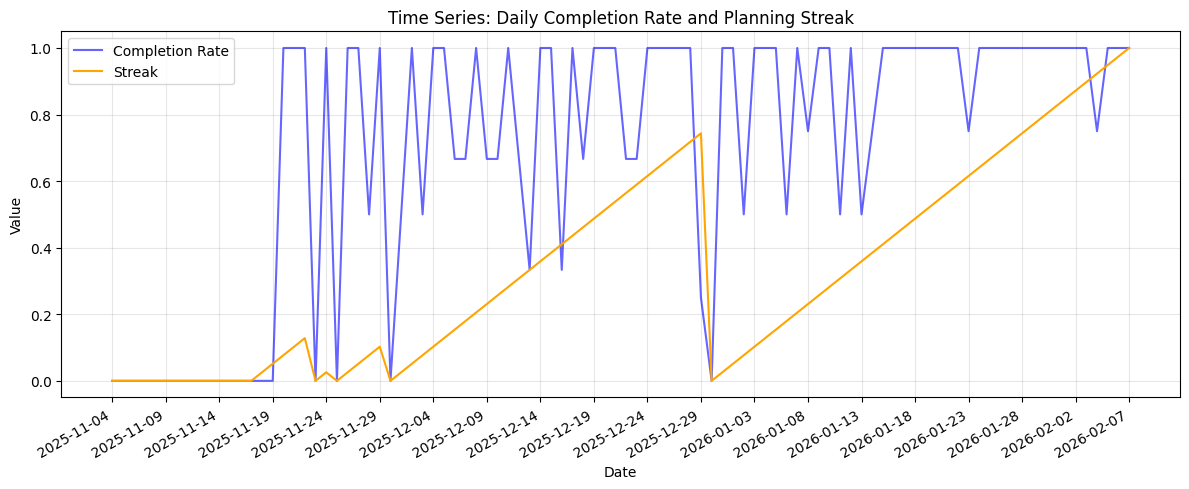

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(daily_agg['date'], daily_agg['completion_rate'], label='Completion Rate', color='blue', alpha=0.6)
plt.plot(daily_agg['date'], daily_agg['planning_streak']/daily_agg['planning_streak'].max(), label='Streak', color='orange')
plt.title("Time Series: Daily Completion Rate and Planning Streak")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True, alpha=0.3)


plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

OBJECTIVE 3 | Clear 80-100% backlogs

In [ ]:
print("Backlog Clearance Summary ")
print(f"Total backlog tasks       : {total_backlogs}")
print(f"Completed backlog tasks   : {completed_backlogs}")
print(f"Backlog clearance rate    : {clearance_rate:.2f}%")

if clearance_rate >= 80:
    print("Objective 3 achieved: Backlog clearance is within 80–100%.")
else:
    print("Objective 2 not achieved")

Backlog Clearance Summary 
Total backlog tasks       : 20
Completed backlog tasks   : 18
Backlog clearance rate    : 90.00%
Objective 3 achieved: Backlog clearance is within 80–100%.


**Research Question 1: Does creating a daily task plan influence planning streak?**




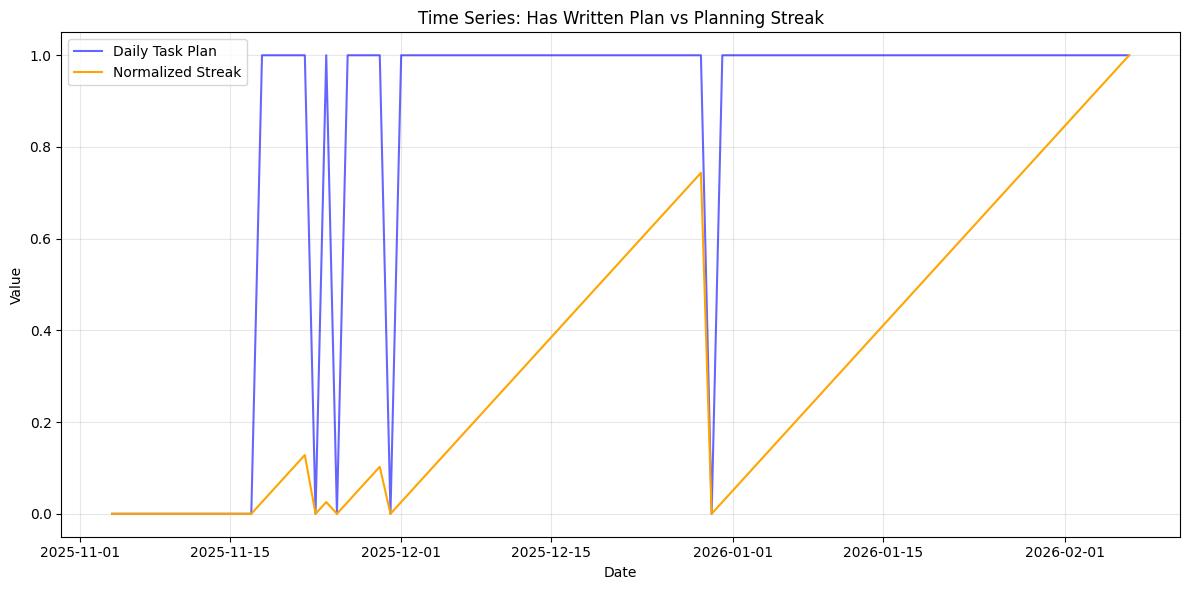

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(daily_agg['date'], daily_agg['has_written_plan'], label='Daily Task Plan', color='blue', alpha=0.6)
plt.plot(daily_agg['date'], daily_agg['planning_streak']/daily_agg['planning_streak'].max(), label='Normalized Streak', color='orange')
plt.title("Time Series: Has Written Plan vs Planning Streak")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# binary and continuous Point Biserial
r_pb, p_pb = stats.pointbiserialr(
    daily_agg['has_written_plan'],
    daily_agg['planning_streak']
)

print("\nPoint-Biserial correlation: has_written_plan and planning_streak")
print(f"r_pb = {r_pb:.3f}")
print(f"p = {p_pb:.5f}")

if p_pb <= 0.05:
    print("Significant (reject null hypothesis)")
else:
    print("Not significant at α = 0.05")


Point-Biserial correlation: has_written_plan and planning_streak
r_pb = 0.531
p = 0.00000
Significant (reject null hypothesis)


**Research Question 2: Does planning streak length affect completion rate?**

In [ ]:

# 1. Group by exact streak length
streak_stats = daily_agg.groupby('planning_streak', as_index=False).agg(
    n_days          = ('completion_rate', 'count'),
    mean_completion = ('completion_rate', 'mean'),
    median_completion = ('completion_rate', 'median'),
    min_completion  = ('completion_rate', 'min'),
    max_completion  = ('completion_rate', 'max'),
    success_rate    = ('successful_day', 'mean')          #100% completion rate of daily task
)


streak_stats['mean_completion_pct'] = (streak_stats['mean_completion'] * 100).round(1)
streak_stats['success_rate_pct']    = (streak_stats['success_rate'] * 100).round(1)

streak_stats = streak_stats[streak_stats['n_days'] >= 1].sort_values('planning_streak')

print("Completion rate & success by exact planning streak length")
print("─────────────────────────────────────────────────────────")
print(streak_stats[['planning_streak', 'n_days', 'mean_completion_pct',
                    'success_rate_pct', 'median_completion']].to_string(index=False))


Completion rate & success by exact planning streak length
─────────────────────────────────────────────────────────
 planning_streak  n_days  mean_completion_pct  success_rate_pct  median_completion
               0      18                  0.0               0.0           0.000000
               1       5                 70.0              60.0           1.000000
               2       4                 75.0              75.0           1.000000
               3       4                 62.5              25.0           0.500000
               4       4                100.0             100.0           1.000000
               5       3                100.0             100.0           1.000000
               6       2                 83.3              50.0           0.833333
               7       2                 58.3               0.0           0.583333
               8       2                100.0             100.0           1.000000
               9       2                 70.8         

Completion Rate for 3 months

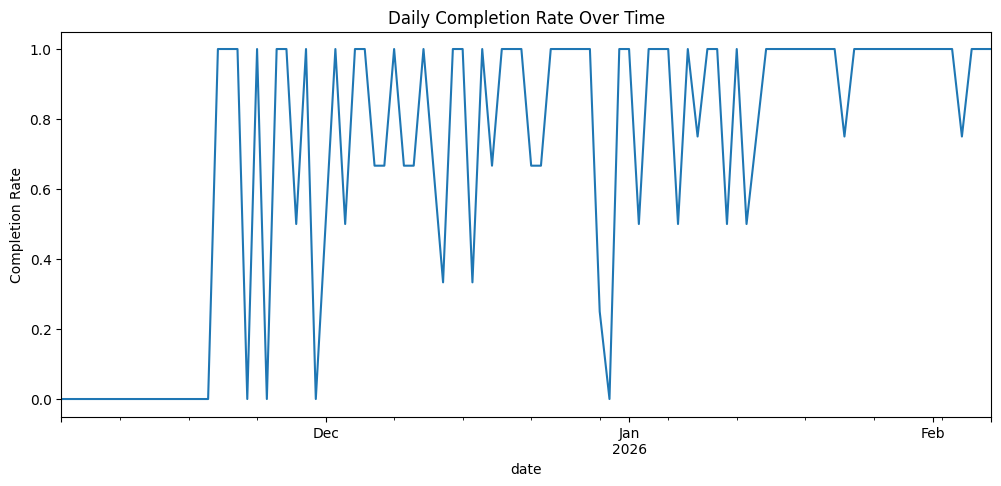

In [ ]:

daily_agg.set_index('date')['completion_rate'].plot(figsize=(12,5))
plt.title('Daily Completion Rate Over Time')
plt.ylabel('Completion Rate')
plt.show()

In [ ]:
print("Completion by planning status:\n",
      pd.crosstab(daily_agg['has_written_plan'], daily_agg['completion_rate'], normalize='index')*100)

print("\nDay of week patterns:\n",
      daily_agg.groupby('day_of_week_num')['completion_rate'].mean().sort_values(ascending=False))

Completion by planning status:
 completion_rate     0.000000  0.250000  0.333333  0.500000  0.666667  \
has_written_plan                                                       
0                 100.000000  0.000000  0.000000  0.000000   0.00000   
1                   2.564103  1.282051  2.564103  8.974359  10.25641   

completion_rate   0.750000   1.000000  
has_written_plan                       
0                 0.000000   0.000000  
1                 5.128205  69.230769  

Day of week patterns:
 day_of_week_num
3    0.815476
5    0.785714
4    0.744048
0    0.724359
2    0.690476
6    0.628205
1    0.476190
Name: completion_rate, dtype: float64


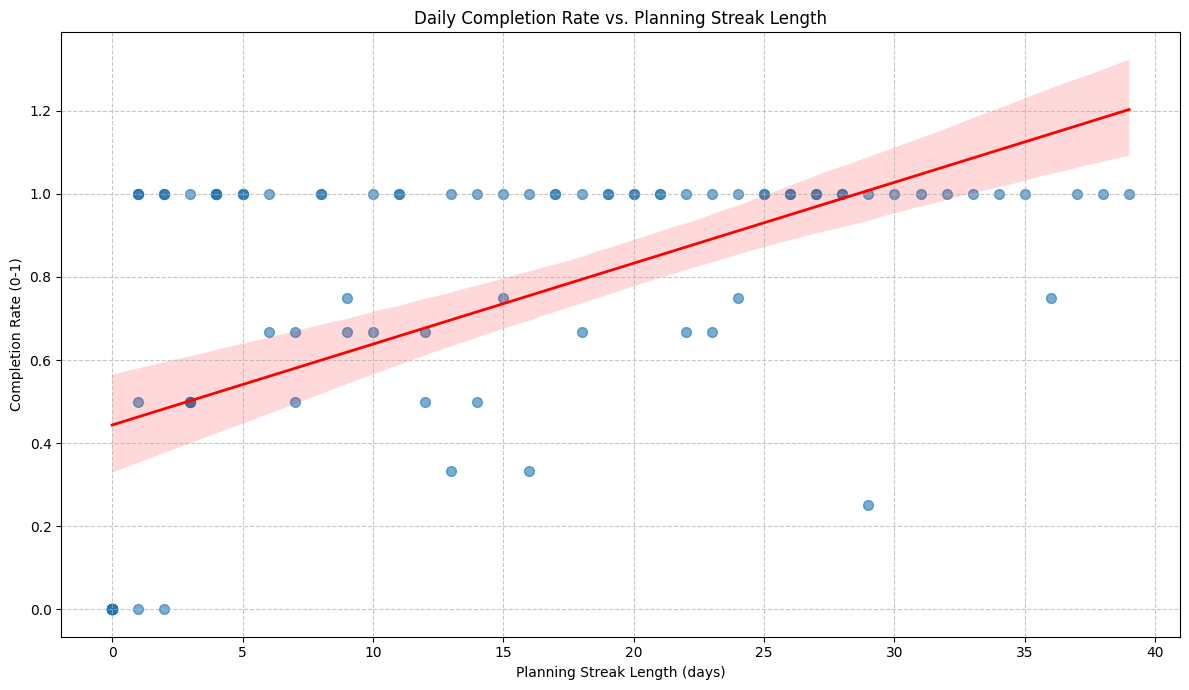

In [ ]:
plt.figure(figsize=(12, 7))
sns.regplot(
    x='planning_streak',
    y='completion_rate',
    data=daily_agg,
    scatter_kws={'alpha':0.6, 's':50},
    line_kws={'color':'red', 'lw':2},
    ci=95
)
plt.title('Daily Completion Rate vs. Planning Streak Length')
plt.xlabel('Planning Streak Length (days)')
plt.ylabel('Completion Rate (0-1)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# A. Pearson correlation: streak and completion_rate
r_pearson, p_pearson = stats.pearsonr(
    streak_stats['planning_streak'],
    streak_stats['mean_completion_pct']
)

print("\nPearson correlation: planning_streak vs ccompletion rate")
print(f"  r    = {r_pearson:.3f}")
print(f"  p    = {p_pearson:.5f}")
if p_pearson <= 0.05:
    print("→ Significant (reject null hypothesis)")
else:
    print("→ Not significant at α = 0.05")


Pearson correlation: planning_streak vs ccompletion rate
  r    = 0.514
  p    = 0.00070
→ Significant (reject null hypothesis)


**Research Question 3: Does daily planning reduce backlog tasks?**

In [ ]:
backlog.head(20)

,backlog_id,description,date_added,is_completed,is_planned
0,B01,Data input task by brother,2025-12-01,1,1
1,B02,Read first 20 pages of Probability chapter,2025-12-04,1,1
2,B03,Day 3 of taking 8 glasses of water,2025-11-29,1,1
3,B04,Reread Intermediate Python in Datacamp,2025-11-24,1,1
4,B05,Finish Supervised Learning Track in Datacamp,2026-01-07,1,1
5,B06,Go back to lifting weights for the 5th day for...,2026-01-12,1,1
6,B07,Run 5-km around UST,2025-12-12,1,1
7,B08,Wake up at 8am for day 15,2025-12-19,1,1
8,B09,Achieve the 90th-day streak in Datacamp,2026-01-03,1,1
9,B10,Finish Linked-In Account,2026-01-08,1,1


In [ ]:
# one-tailed binomial test

alpha = 0.05
hypothesized_p_baseline = 0.5  # baseline


print("Binomial Tests")

planned_group = backlog[backlog['is_planned'] == 1]
unplanned_group = backlog[backlog['is_planned'] == 0]


observed_rate_planned = None

def run_binomial_test(group_name, df_group, hypothesized_p, alternative):
    global observed_rate_planned

    if not df_group.empty:
        k = df_group['is_completed'].sum()
        n = len(df_group)

        if n == 0:
            print(f"\n{group_name} Tasks (n=0): No tasks in this group.")
            return

        observed_rate = k / n

        if group_name == "Planned":
            observed_rate_planned = observed_rate

        binom_result = binomtest(k=k, n=n, p=hypothesized_p, alternative=alternative)

        print(f"\n{group_name} Tasks (n={n}, Completed={k}):")
        print(f"  Observed Completion Rate: {observed_rate:.2%}")
        print(f"  P-value (alternative='{alternative}') vs. hypothesized {hypothesized_p:.0%}: {binom_result.pvalue:.5f}")
        if binom_result.pvalue < alpha:
            print(f"Significant: Observed completion rate ({observed_rate:.2%}) is significantly {alternative} than {hypothesized_p:.0%} (p < {alpha}).")
        else:
            print(f"Not Significant: Observed completion rate ({observed_rate:.2%}) is not significantly {alternative} than {hypothesized_p:.0%} (p >= {alpha}).")
    else:
        print(f"\nNo {group_name.lower()} tasks found.")

# one-tailed tests for both
run_binomial_test("Unplanned", unplanned_group, hypothesized_p_baseline, alternative='less')
run_binomial_test("Planned", planned_group, hypothesized_p_baseline, alternative='greater')

Binomial Tests

No unplanned tasks found.

Planned Tasks (n=20, Completed=18):
  Observed Completion Rate: 90.00%
  P-value (alternative='greater') vs. hypothesized 50%: 0.00020
Significant: Observed completion rate (90.00%) is significantly greater than 50% (p < 0.05).


/tmp/ipython-input-3923156657.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=task_labels, y=task_counts, palette=colors)


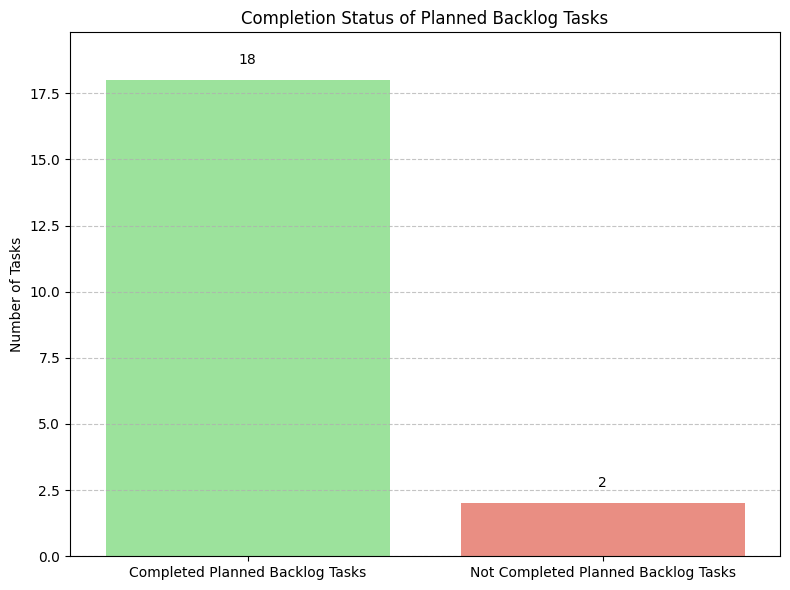

In [ ]:
completed_backlog_tasks = planned_group['is_completed'].sum()
not_completed_backlog_tasks = len(planned_group) - completed_backlog_tasks

task_counts = [completed_backlog_tasks, not_completed_backlog_tasks]
task_labels = ['Completed Planned Backlog Tasks', 'Not Completed Planned Backlog Tasks']
colors = ['lightgreen', 'salmon']

plt.figure(figsize=(8, 6))
sns.barplot(x=task_labels, y=task_counts, palette=colors)

plt.title('Completion Status of Planned Backlog Tasks')
plt.ylabel('Number of Tasks')
plt.ylim(0, max(task_counts) * 1.1)
for index, value in enumerate(task_counts):
    plt.text(index, value + 0.5, str(int(value)), ha='center', va='bottom')
plt.grid(axis='y', alpha=0.75, linestyle='--')
plt.tight_layout()
plt.show()